In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import time

# Load Data


Load train data


In [3]:
path_train_data = "data_set/train.csv"

df = utils.load_csv_data(path_train_data)

# Print the loaded data
if isinstance(df, pd.DataFrame):
    print(f"dimension train data: {df.shape}")
    print(f"dimension train data: {type(df)}")
else:
    print("train_data is not a DataFrame")

del path_train_data

Successfully loaded data from data_set/train.csv
dimension train data: (1460, 81)
dimension train data: <class 'pandas.core.frame.DataFrame'>


without all datas from .txt


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0. Extract and scale the target column (SalePrice)
scaler_sale_price = StandardScaler()
y = scaler_sale_price.fit_transform(df[["SalePrice"]])  # shape: (n_samples, 1)

x = df
print(x.shape)
# Drop original SalePrice from df if present
if "SalePrice" in x.columns:
    x = x.drop("SalePrice", axis=1)
if "Id" in x.columns:
    x = x.drop("Id", axis=1)

print(x.shape)

# 1. Split columns by data type
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()

# 2. Handle missing values
x[categorical_cols] = x[categorical_cols].fillna(
    "NA"
)  # Fill missing categorical with "NA"
x[numerical_cols] = x[numerical_cols].fillna(0)  # Fill missing numerical with 0

# 3. One-hot encode categorical features
x_encoded = pd.get_dummies(x, columns=categorical_cols)


# 4. Normalize numerical features
scaler_inputData = StandardScaler()
x_encoded[numerical_cols] = scaler_inputData.fit_transform(x_encoded[numerical_cols])
print(x_encoded.shape)
print(numerical_cols)

# 5. Define feature matrix
x = x_encoded
# 6. Split into training and validation sets
x_train_pd, x_val_pd, y_train_pd, y_val_pd = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# 7. Convert to NumPy arrays and cast to float32 (for TensorFlow)
x_train = x_train_pd.to_numpy().astype("float32")
x_val = x_val_pd.to_numpy().astype("float32")
y_train = y_train_pd.astype("float32")
y_val = y_val_pd.astype("float32")

# 8. delete temporary data
del x_encoded, x, y

(1460, 81)
(1460, 79)
(1460, 838)
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [5]:
print(x_train_pd.shape)
print(x_train.shape)
print(x_val_pd.shape)
print(x_val.shape)
print(y_train_pd.shape)
print(y_train.shape)
print(y_val_pd.shape)
print(y_val.shape)

(1168, 838)
(1168, 838)
(292, 838)
(292, 838)
(1168, 1)
(1168, 1)
(292, 1)
(292, 1)


In [6]:
print(type(x_train_pd))
print(type(x_val_pd))
print(type(y_train_pd))
print(type(y_val_pd))
print(type(x_train))
print(type(x_val))
print(type(y_train))
print(type(y_val))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape[1])




Epoch 1/15


73/73 [==============================] - 1s 4ms/step - loss: 1.5216 - mae: 0.9374 - val_loss: 0.7142 - val_mae: 0.5443
Epoch 2/15
73/73 [==============================] - 0s 2ms/step - loss: 0.6352 - mae: 0.5980 - val_loss: 0.6408 - val_mae: 0.5196
Epoch 3/15
73/73 [==============================] - 0s 2ms/step - loss: 0.4922 - mae: 0.5048 - val_loss: 0.4512 - val_mae: 0.4163
Epoch 4/15
73/73 [==============================] - 0s 2ms/step - loss: 0.4285 - mae: 0.4665 - val_loss: 0.3238 - val_mae: 0.3496
Epoch 5/15
73/73 [==============================] - 0s 1ms/step - loss: 0.4334 - mae: 0.4630 - val_loss: 0.2975 - val_mae: 0.3298
Epoch 6/15
73/73 [==============================] - 0s 2ms/step - loss: 0.4237 - mae: 0.4295 - val_loss: 0.2602 - val_mae: 0.3045
Epoch 7/15
73/73 [==============================] - 0s 2ms/step - loss: 0.2857 - mae: 0.3786 - val_loss: 0.2154 - val_mae: 0.2992
Epoch 8/15
73/73 [==============================] - 0s 1ms/step - loss: 0.3150 - mae:

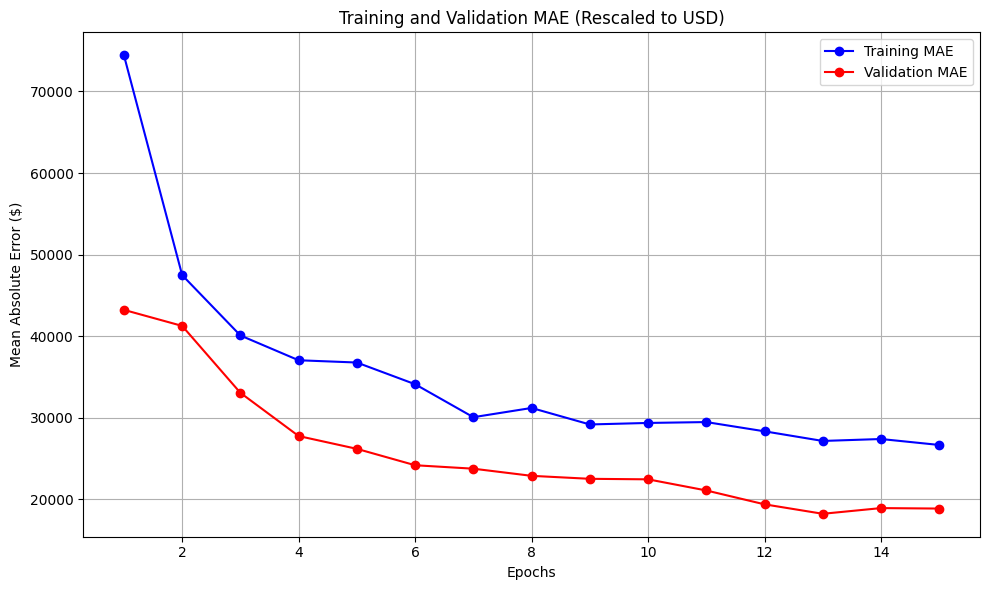

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

start = time.time()

early_stop = EarlyStopping(monitor="val_mae", patience=5, restore_best_weights=True)


model = Sequential(
    [
        Dense(32, activation="relu", input_shape=(x_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(16, activation="relu"),
        Dense(1),
    ]
)

# model = Sequential(
#     [
#         Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
#         Dropout(0.4),
#         Dense(32, activation="relu"),
#         Dense(1),
#     ]
# )

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(
    x_train,
    y_train,
    epochs=15,
    validation_data=(x_val, y_val),
    batch_size=16,
    callbacks=[early_stop],
)

print(f"🕒 Celkový čas trénování: {time.time() - start:.2f} s")

val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
print(f"- ✅ finished: val_mae = {val_mae:.2f}")
print(f"- ✅ finished: val_mse = {val_mse:.2f}")

val_mae_usd = val_mae * scaler_sale_price.scale_[0]
val_rmse_usd = (val_mse * (scaler_sale_price.scale_[0] ** 2)) ** 0.5
print(f"- ✅ finished: val_mae = {val_mae:.2f} → ~${val_mae_usd:,.0f}")
print(f"- ✅ finished: val_rmse → ~${val_rmse_usd:,.0f}")


_ = utils.plot_rescaled_history(history.history, metric="mae", scaler=scaler_sale_price)

# Test build model


## Test on validation data


10/10 [==============================] - 0s 2ms/step
      Actual      Predicted
0   154500.0  133440.281250
1   325000.0  325259.906250
2   115000.0  114978.453125
3   159000.0  158157.140625
4   315500.0  315879.187500
5    75500.0   87095.546875
6   311500.0  220726.937500
7   146000.0  141079.359375
8    84500.0   86399.851562
9   135500.0  136555.265625
10  145000.0  138748.562500
11  130000.0  110641.585938
12   81000.0  122462.015625
13  214000.0  192661.343750
14  181000.0  171741.890625
15  134500.0  117283.414062
16  183500.0  187978.312500
17  135000.0  121488.687500
18  118400.0  128434.460938
19  226000.0  222653.578125
20  155000.0  165120.312500
21  210000.0  205193.984375
22  173500.0  175524.859375
23  129000.0  125633.773438
24  192000.0  195322.359375
25  153900.0  149548.609375
26  181134.0  172756.312500
27  141000.0  103378.000000
28  181000.0  172341.187500
29  208900.0  188478.296875
30  127000.0  129183.359375
31  284000.0  266176.750000
32  200500.0  196431.46

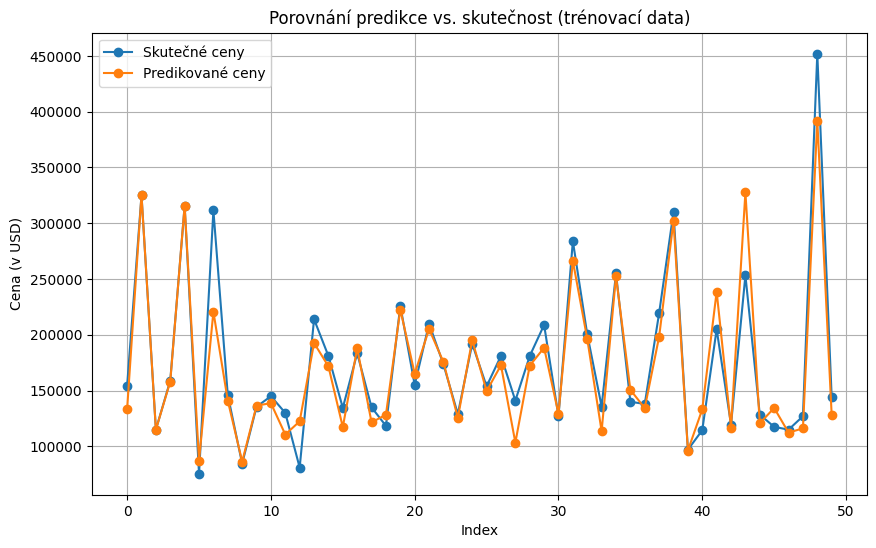

In [8]:
# 11. Předpověď na testovacích datech
y_pred_scaled = model.predict(x_val)

# 12. Inverze zpět na reálné ceny
y_pred_real = scaler_sale_price.inverse_transform(y_pred_scaled)
y_test_real = scaler_sale_price.inverse_transform(y_val.reshape(-1, 1))

# 13. Výstup porovnání
results = pd.DataFrame(
    {"Actual": y_test_real.flatten(), "Predicted": y_pred_real.flatten()}
)

count = 50
print(results.head(count))

plt.figure(figsize=(10, 6))
plt.plot(results["Actual"][:count], marker="o", label="Skutečné ceny")
plt.plot(results["Predicted"][:count], marker="o", label="Predikované ceny")
plt.title("Porovnání predikce vs. skutečnost (trénovací data)")
plt.xlabel("Index")
plt.ylabel("Cena (v USD)")
plt.legend()
plt.grid(True)
plt.show()